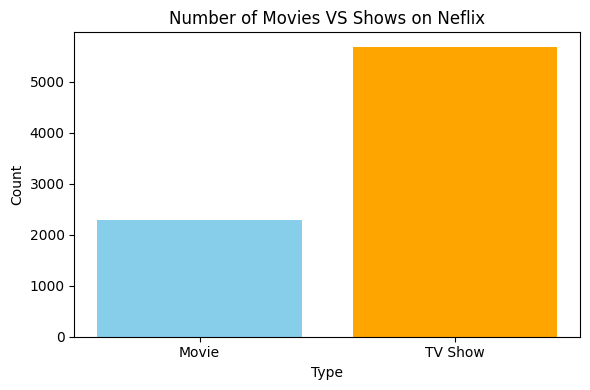

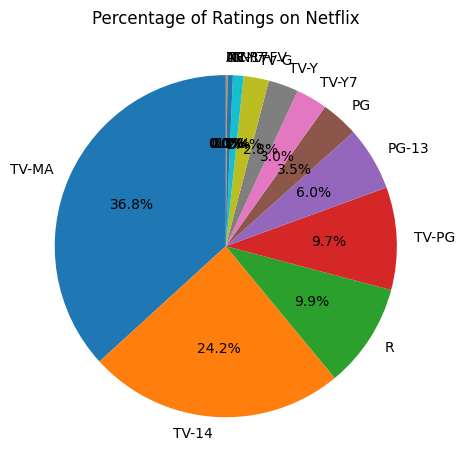

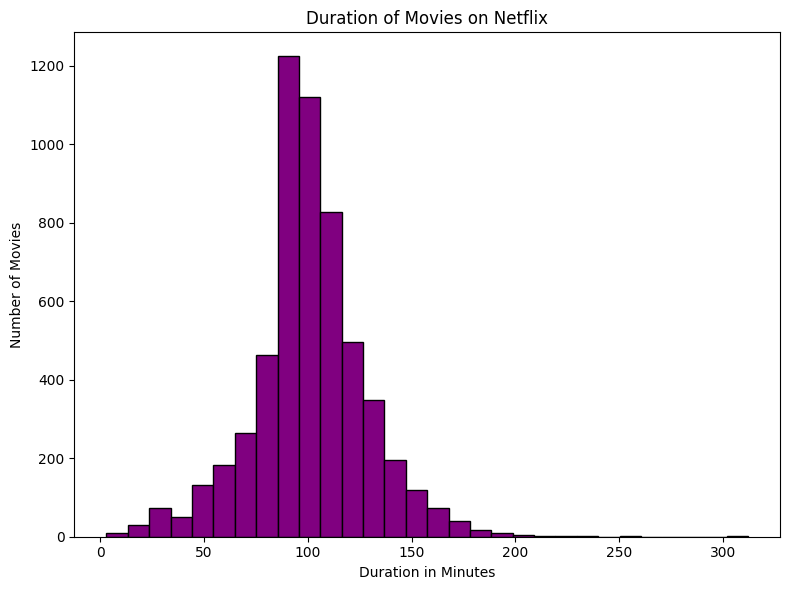

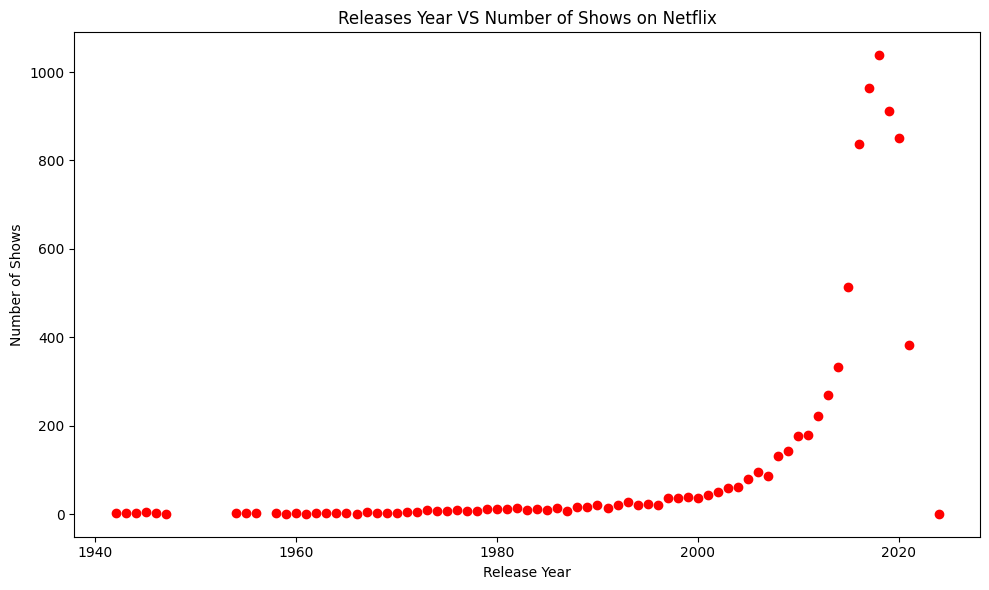

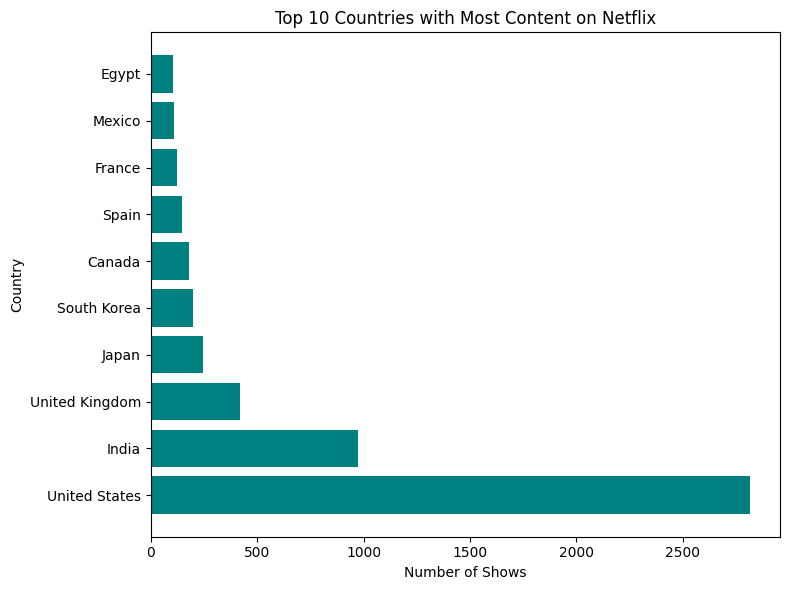

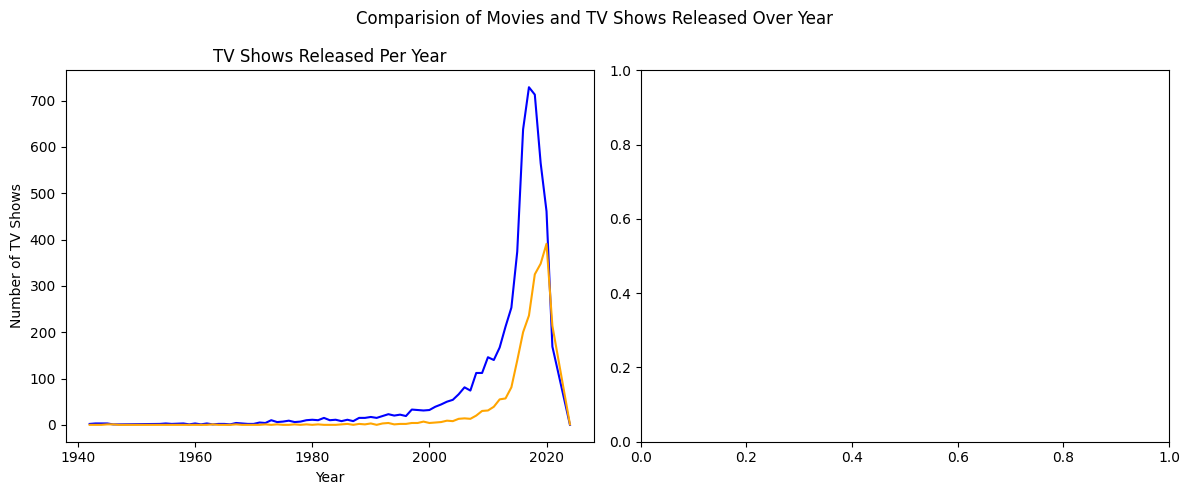

In [18]:
#load the data
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('netflix_titles.csv',encoding='latin1')

#clean data
df = df.dropna(subset=['type','release_year','rating','country','duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.sort_values(), color=['skyblue','orange'])
plt.title('Number of Movies VS Shows on Neflix')  
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

rating_counts = df['rating'].value_counts()
plt.Figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%' ,startangle=90)
plt.title('Percentage of Ratings on Netflix')
plt.tight_layout()
plt.savefig('content_rating.png')
plt.show()

movie_df = df[df['type'] == 'Movie'].copy()
movie_df ['duration_int'] = movie_df['duration'].str.replace(' min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Duration of Movies on Netflix')
plt.xlabel('Duration in Minutes')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration.png')
plt.show()


release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values,color='red')
plt.title('Releases Year VS Number of Shows on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_count.png')
plt.show()

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top_10_countries.png')
plt.show()

content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig,ax = plt.subplots(1,2, figsize=(12,5))

#first subplot : MOVIES
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplot : SHOWS
ax[0].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[0].set_title('TV Shows Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of TV Shows')

fig.suptitle('Comparision of Movies and TV Shows Released Over Year')

plt.tight_layout()
plt.savefig('Movies_tv_shows_comparison.png')
plt.show()

